**Disclaimer**: This file is only used in the social media analysis project in BAIT 508, please don't spread it to any other places. In addtion, thanks a lot for the Python Script provided by the instructor team! 

**Gourp Members**(arranged by the last name): <br />
* Junyi Gu (86351079)
* Kristy Lui (61389664) 
* Cherry (Dao) Nguyen (18921221)

# Project Overview 

People actively express their opinions in social media platforms such as Twitter, Facebook, Instagram, WeChat, TikTok, etc. As aspiring analytics experts, we want to take this opportunity by using our Python skills to conduct social media analysis. 

* First, each team will select one keyword of interests, then collect 10K tweets of the keyword. 
* Second, you will do preliminary analysis on the collected data. 
* Then, to understand what kinds of topics are discussed on the keywords, you will create word clouds for data visualization. 
* In addition, you will conduct sentiment analysis to measure how positive or negative the collected tweets are. 
* Finally, please conclude the project by describing the insights you gained based on the conducted analyses. Please follow the following detailed instructions. 

In [3]:
# import necessary packages
import tweepy 
from TwitterCollector import TwitterCollector # the instructor team provided
from datetime import datetime # to specify the collection time window

ModuleNotFoundError: No module named 'tweepy'

In [2]:
# Gain access to Tweets
bearer_token = r"AAAAAAAAAAAAAAAAAAAAAIymhAEAAAAALDZdqS7sqauhJjbj07tVaK%2FYZzE%3DK3IT9Ru8D2sDKN4BaLr3KYy7xfsNr7TYsFOCp2o8aoNvzRzliY"
tc = TwitterCollector(bearer_token = bearer_token) # initialize a TwitterCollector instance

NameError: name 'TwitterCollector' is not defined

## A.	[Keyword Selection and Data Collection; 20 points]
1.	Pick one keyword (or multiple keywords if you want) of your interests.
2.	[tweet data] Using the Python script the instructor team provided, collect 10K recent tweets on the selected keyword.
3.	From the collected tweets, get the list of unique author IDs.
4.	[author data] Using the provided Python script, collect the author information of those author IDs.


In [3]:
# 1. Pick one keyword (or multiple keywords if you want) of your interests.
query1 = 'spy family -is:retweet lang:en'  # tweets containing 'spy' and 'family', written in English, and excluding retweets

In [4]:
# 2. [tweet data] Collect 10K recent tweets on the selected keyword.
'''If we have fetched and saved one json file, skip this section and run next one'''
recent_tweets = tc.fetch_recent_tweets(
    
    query = query1  # specify the search query                         
    , tweets_cnt = 10000  # specify the number of tweets you want to collect
    , save_result = True  # if True, the tweets will be automatically saved to a json file apart from the value returned
    , save_dir = 'group5_data'  # the file will be saved in this director
    , file_name = 'spyxfamily.json'  # this will be the file name
    , start_time = datetime.fromisoformat('2022-09-30 00:00:00')  # starting time for tweet collection, must be within 7 days
    , end_time = datetime.fromisoformat('2022-10-01 23:59:59')  # ending time for tweet collection, must be within 7 days
                                            ) 

BadRequest: 400 Bad Request
Invalid 'start_time':'2022-09-30T00:00Z'. 'start_time' must be on or after 2022-10-03T21:56Z
Invalid 'end_time':'2022-10-01T23:59Z'. 'end_time' must be on or after 2022-10-03T21:56Z

In [35]:
'''Use it instead of fetching again if we have fetched and saved one json file'''
import json
with open("group5_data\spyxfamily.json") as json_file:
    recent_tweets = json.load(json_file)

In [41]:
# 3. From the collected tweets, get the list of unique author IDs.
author_id = []
unique_author_id = []
unique_name = []
for i in range(len(recent_tweets['tweets'])):
    author_id.append(recent_tweets['tweets'][i]['author_id']) # collect author id in all tweets for Question 7 in Part B
    if recent_tweets['tweets'][i]['author_id'] not in unique_author_id: # avoid duplicated author
        unique_author_id.append(recent_tweets['tweets'][i]['author_id'])
    else:
        continue
len(unique_author_id)

8268

In [38]:
# 4. [author data] Using the provided Python script, collect the author information of those author IDs.
'''If we have fetched and saved one npy file, skip this section and run next one'''
import time
author_info = []
for i in unique_author_id:
    try:
        author_info.append(tc.fetch_author_info(i))
        time.sleep(1)
    except (tweepy.TooManyRequests, ConnectionError) as e: # deal with HTTP Error 409 & Connection Error
                                                           # source: https://piazza.com/class/l6361peonhd70r/post/200
        print(e)    
        a_author_info=np.array(author_info)
        np.save('author_info.npy',a_author_info) # save data in a npy file
        time.sleep(15*60) # Rest for 15 mins and wait for the timeframe to reset
    except AttributeError: # deal with Nonetype Error
        print('AttributeError')
        continue

AttributeError
AttributeError
429 Too Many Requests
Too Many Requests
AttributeError
AttributeError
AttributeError
AttributeError
429 Too Many Requests
Too Many Requests
AttributeError
AttributeError
429 Too Many Requests
Too Many Requests
429 Too Many Requests
Too Many Requests
AttributeError
AttributeError
AttributeError
429 Too Many Requests
Too Many Requests
AttributeError
429 Too Many Requests
Too Many Requests
AttributeError
429 Too Many Requests
Too Many Requests
AttributeError
AttributeError
429 Too Many Requests
Too Many Requests
AttributeError
429 Too Many Requests
Too Many Requests
AttributeError
429 Too Many Requests
Too Many Requests
AttributeError
429 Too Many Requests
Too Many Requests
429 Too Many Requests
Too Many Requests
AttributeError
429 Too Many Requests
Too Many Requests
AttributeError
429 Too Many Requests
Too Many Requests
AttributeError
AttributeError
429 Too Many Requests
Too Many Requests
AttributeError
429 Too Many Requests
Too Many Requests
AttributeError


In [39]:
# read .npy file
'''Use it instead of fetching again if we have fetched and saved one npy file'''
import numpy as np
author_info_list = list(np.load("author_info.npy",allow_pickle=True))

In [40]:
len(author_info_list)

8095

## B. [Preliminary Analysis; 20 points]
Using text column of all the collected tweets, please answer the following questions:
1.	What are the ten most popular words with and without stop words?
2.	What are the ten most popular hashtags (#hashtag)?
3.	What are the ten most frequently mentioned usernames (@username)?
4.	Which are the three most common sources of the tweets? A tweet’s source can be found in the “source” field in the tweet data.
5.	Create a line chart to show the time trend of tweet counts (number of tweets in a day (or an hour or a minute) depending on the collected data).
6.	Which are the three most influential tweets? A tweet’s influence score is the sum of “quote_count”, “reply_count”, “retweet_count”, “like_count”. These counts can be found in the “public_metrics” in the tweet data.
7.	Who are the three most vocal authors on the keyword? In other words, who are the most frequently tweeting authors in the tweet data? 
8.	Who are the three most influential authors? A user’s influence score is the sum of “followers_count”, “following_count”, “listed_count”. “tweet_count” in the author data.



In [42]:
# import necessary packages
from collections import Counter
from pprint import pprint
import nltk
import string
import pickle
import matplotlib.pyplot as plt

# The table of removing punctuation and digits
puncs = string.punctuation
dgts = string.digits
table_dp = str.maketrans(dgts + puncs, (len(dgts)+len(puncs)) * " ")

# Using text column of all the collected tweets
text = []
for i in range(len(recent_tweets['tweets'])):
    if 'https' in recent_tweets['tweets'][i]['text']:
        no_link = recent_tweets['tweets'][i]['text'].split('https')
        text.append(no_link[0])
    else:
        text.append(recent_tweets['tweets'][i]['text'])

the 10 most common words are [('family', 9877), ('spy', 9559), ('x', 6855), ('n', 3928), ('the', 3035), ('i', 2791), ('is', 2251), ('and', 2121), ('to', 1807), ('of', 1791)]


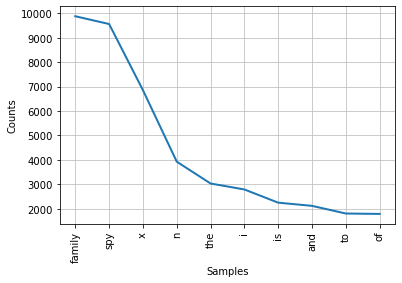

the 10 most common words excluding stop words are [('family', 9877), ('spy', 9559), ('new', 1136), ('episode', 950), ('back', 947), ('anime', 821), ('season', 737), ('today', 658), ('spyxfamily', 656), ('part', 622)]


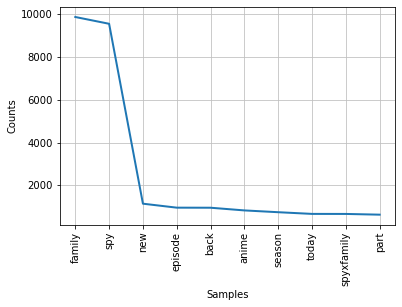

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [43]:
# 1. What are the ten most popular words with and without stop words?

# stopwords
with open('stopwords.pkl', 'rb') as f:
    stopwords = pickle.load(f)
for i in ['de','mha','xa','im','pu','do','gt','let','nd','n','It','it','na']: # add stopwords
    stopwords.append(i)
stopwords
    
# select the ten most popular words with stop words
words_with = nltk.word_tokenize(str(text).translate(table_dp).lower()) # lowercase, remove punctuation & digits, split 
c_with = Counter(words_with)
print('the 10 most common words are '+ str(c_with.most_common(10)))
freq_with = nltk.FreqDist(words_with)
freq_with.plot(10)

# select the ten most popular words without stop words
words_without = []
for w in words_with:
    if w not in stopwords and len(w) > 1:
        words_without.append(w)
        
c_without = Counter(words_without)
print('the 10 most common words excluding stop words are '+ str(c_without.most_common(10)))
freq_without = nltk.FreqDist(words_without)
freq_without.plot(10)

the 10 most popular hashtags are [('#SPY_FAMILY', 1465), ('#SPYxFamily', 389), ('#anime', 119), ('#yorforger', 117), ('#spyxfamily', 100), ('#AnyaForger', 79), ('#SPYFAMILY', 63), ('#SPYxFAMILY', 61), ('#COYG', 51), ('#ARSTOT', 51)]


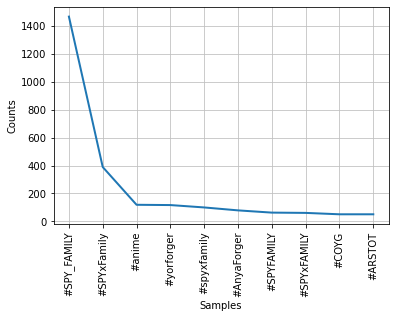

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [44]:
# 2. What are the ten most popular hashtags (#hashtag)?

hashtag = []
for i in text:
    for j in i.split(): # not use .lower() because hashtag is sensitive to case
        if '#' == j[0] and len(j) > 1:
            if ord(j[1]) < 128: #make sure the results are English
                hashtag.append(j)
            
c_hashtag = Counter(hashtag)
print('the 10 most popular hashtags are '+ str(c_hashtag.most_common(10)))
freq_hashtag = nltk.FreqDist(hashtag)
freq_hashtag.plot(10)

the 10 most frequently mentioned usernames are [('@animesinjapan', 107), ('@OfertasMangas', 105), ('@AniTrendz', 91), ('@MangasPrecinho', 72), ('@KaggyFilms', 21), ('@RemindMe_OfThis', 15), ('@Crunchyroll', 14), ('@spyfamily_en', 14), ('@Aovibees', 14), ('@menilho', 14)]


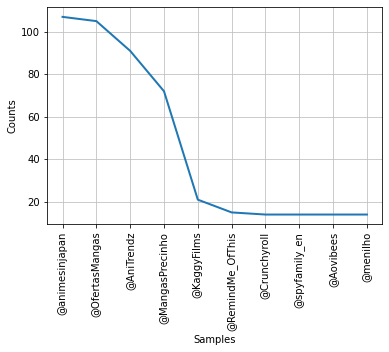

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [45]:
# 3.What are the ten most frequently mentioned usernames (@username)?
username = []
for i in text:
    for j in i.split():
        if '@' == j[0] and len(j)>1 :
            username.append(j)
            
c_username = Counter(username)
print('the 10 most frequently mentioned usernames are '+ str(c_username.most_common(10)))
freq_username = nltk.FreqDist(username)
freq_username.plot(10)

the 3 most common sources of the tweets are [('Twitter for Android', 3511), ('Twitter for iPhone', 3360), ('Twitter Web App', 2139)]


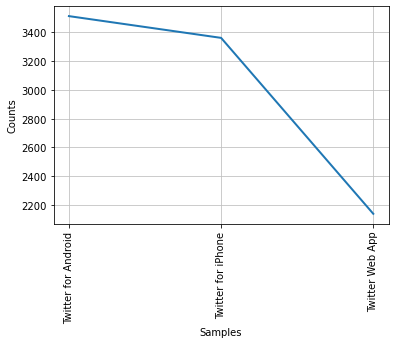

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [46]:
# 4. Which are the three most common sources of the tweets? A tweet’s source can be found in the “source” field in the tweet data.
source = []
for i in range(len(recent_tweets['tweets'])):
    source.append(recent_tweets['tweets'][i]['source'])

c_source = Counter(source)
print('the 3 most common sources of the tweets are '+ str(c_source.most_common(3)))
freq_source = nltk.FreqDist(source)
freq_source.plot(3)

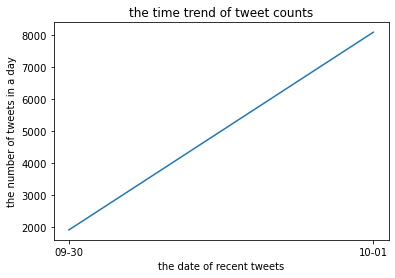

In [47]:
# 5. Create a line chart to show the time trend of tweet counts (number of tweets in a day (or an hour or a minute) 
# depending on the collected data).
time_x = ['09-30','10-01']
count_y = [0,0]
for i in recent_tweets['tweets']:
    if i['created_at'][:10] == '2022-09-30':
        count_y[0] +=1
    elif i['created_at'][:10] == '2022-10-01':
        count_y[1] +=1
    else:
        print('error!') 

plt.plot(time_x, count_y)
plt.xlabel("the date of recent tweets")
plt.ylabel('the number of tweets in a day')
plt.title('the time trend of tweet counts')
plt.show()

In [48]:
# 6. Which are the three most influential tweets? 
# A tweet’s influence score is the sum of “quote_count”, “reply_count”, “retweet_count”, “like_count”. 
# These counts can be found in the “public_metrics” in the tweet data.
influence_tweet = []
for i in range(len(recent_tweets['tweets'])):
    public_metrics = recent_tweets['tweets'][i]['public_metrics']
    influence_tweet.append(public_metrics['retweet_count'] + 
                           public_metrics['reply_count'] + 
                           public_metrics['like_count'] + 
                           public_metrics['quote_count'])
    
# find the index of the three most influential tweets
# source: https://blog.csdn.net/ns2250225/article/details/80118621
import heapq
max_influence_tweet = map(influence_tweet.index,heapq.nlargest(3,influence_tweet))
print('the 3 influential tweets in descending order are ' + '\n')
for i in list(max_influence_tweet):
    print('the influence score is ' + str(influence_tweet[i]))
    print(recent_tweets['tweets'][i]['text'])
    print('\n')

the 3 influential tweets in descending order are 

the influence score is 156044
The Forgers dressed up for the return of SPY x FAMILY! 🎆 https://t.co/apJvFKkXgO


the influence score is 85326
Smile! New episodes of SPY x FAMILY start tomorrow!! 🌟 https://t.co/H9Uxa9gr4h


the influence score is 57754
i love this bit hahah 
#SPY_FAMILY 

https://t.co/Fg0d3PjKUM




In [49]:
# 7.Who are the three most vocal authors on the keyword? In other words, who are the most frequently tweeting authors in the tweet data?
author_id_no_dup = {}
for i in author_id:
    if i not in author_id_no_dup:
        author_id_no_dup[i] = 1
    else:
        author_id_no_dup[i] +=1

three_most_vocal_author = sorted(author_id_no_dup.items(), key = lambda kv:(kv[1], kv[0]),reverse = True)[:3]
for k,v in three_most_vocal_author:
    print(str(tc.fetch_author_info(k)['name']) + ' appears ' + str(v) + ' times in recent tweets.')
    print('\n')

Yuzukahachimir appears 47 times in recent tweets.


Screenshot Anime Seasonal appears 39 times in recent tweets.


Anime and Comic Book appears 36 times in recent tweets.




In [50]:
# 8. Who are the three most influential authors? 
# A user’s influence score is the sum of “followers_count”, “following_count”, “listed_count”. “tweet_count” in the author data.
influence_author = []
for i in range(len(list(author_info_list))):
    public_metrics = list(author_info_list)[i]['public_metrics']
    influence_author.append(public_metrics['followers_count'] + 
                            public_metrics['following_count'] + 
                            public_metrics['listed_count'] + 
                            public_metrics['tweet_count'])

        
# find the index of the three most influential tweets
# source: https://blog.csdn.net/ns2250225/article/details/80118621
import heapq
max_influence_author = map(influence_author.index,heapq.nlargest(3,influence_author))
print('the 3 most influential authors in descending order are ' + '\n')
for i in list(max_influence_author):
    print('the influence score is ' + str(influence_author[i]))
    print(str(author_info_list[i]['name']))
    print('\n')

the 3 most influential authors in descending order are 

the influence score is 6408701
Crunchyroll


the influence score is 2115372
Daily Express


the influence score is 1945724
くろう




## C. [Word Cloud; 20 points]
Create a word cloud from the collected tweets. Please remove stop words before feeding the text into the wordcloud module. Feel free to add meaningless words (e.g, br, sr, etc.) into the stop words list for better interpretation. You don’t need to do stemming/lemmatization for this project.



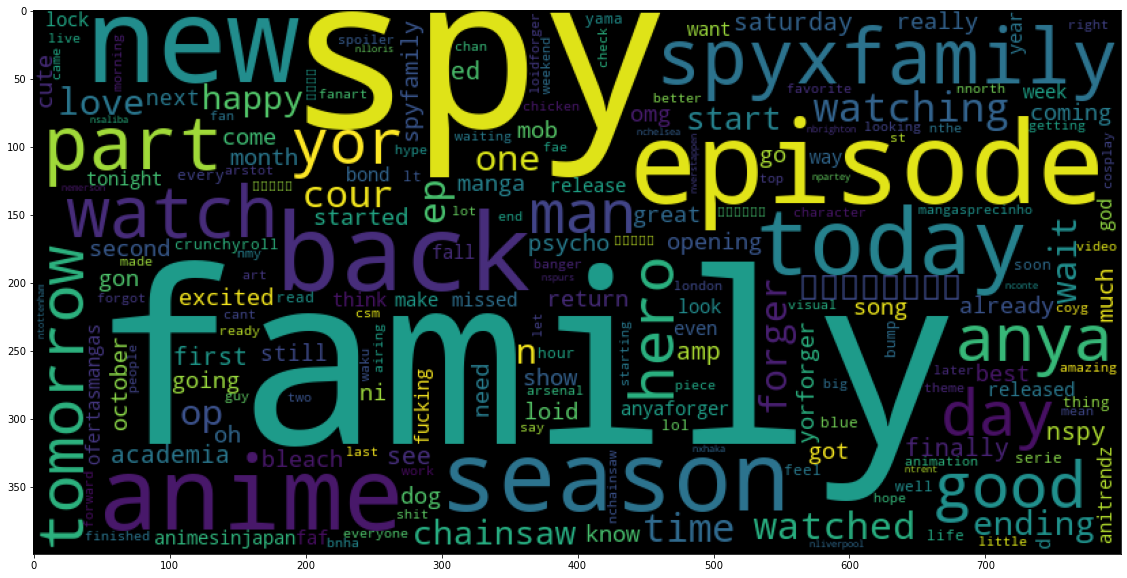

In [51]:
from wordcloud import WordCloud

 # lower max_font_size
wordcloud = WordCloud(width=800, height=400, collocations=False).generate(' '.join(words_without)) 
# note that text is a string, not a list

# Display the generated image:
plt.figure(figsize=(20,10)) # set up figure size
plt.imshow(wordcloud) # word cloud image show
plt.axis("on") # turn on axis
plt.savefig('spyxfamily.png') # save as PNG file
plt.savefig('spyxfamily.pdf') # save as PDF file
plt.show()  # show in Jupyter notebook

## D.	[Sentiment Analysis; 20 points]
Using TextBlob, calculate the polarity and subjectivity scores for the collected tweets, and answer the following questions.
1.	What are the average polarity and subjectivity scores?
2.	Visualize the polarity and subjectivity score distributions using histograms, where X-axis is the score and Y-axis is the tweet count in the score bin. In total, there should be 2 histograms for this task.
3.	Based on the polarity scores, what are the most positive and negative tweets on the keyword? Why is the author happy/angry on the topic? If there are multiple tweets with same sentiment scores, please pick 2-3 tweets among them.




In [15]:
# collect the polarity and subjectivity scores of each tweet
from textblob import TextBlob

pol = []
sub = []
for i in text:
    tb = TextBlob(i)
    pol.append(tb.sentiment.polarity)
    sub.append(tb.sentiment.subjectivity)

In [16]:
# 1. What are the average polarity and subjectivity scores?
import numpy as np
print('the average polarity is ' + str(np.mean(pol)))
print('the average subjectivity is ' + str(np.mean(sub)))

the average polarity is 0.10621054908004085
the average subjectivity is 0.2517198064125689


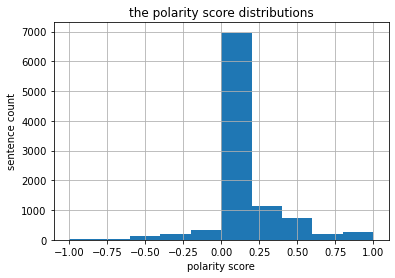

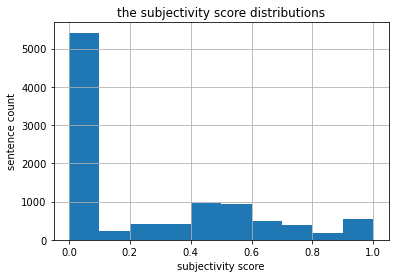

In [17]:
# 2. Visualize the polarity and subjectivity score distributions using histograms, 
# where X-axis is the score and Y-axis is the tweet count in the score bin. In total, there should be 2 histograms for this task.

plt.hist(pol, bins=10) #, normed=1, alpha=0.75)
plt.xlabel('polarity score')
plt.ylabel('sentence count')
plt.title('the polarity score distributions')
plt.grid(True)
plt.savefig('polarity.pdf')
plt.show()


plt.hist(sub, bins=10) #, normed=1, alpha=0.75)
plt.xlabel('subjectivity score')
plt.ylabel('sentence count')
plt.title('the subjectivity score distributions')
plt.grid(True)
plt.savefig('subjectivity.pdf')
plt.show()

In [18]:
# Based on the polarity scores, what are the most positive and negative tweets on the keyword? 
# Why is the author happy/angry on the topic? 
# If there are multiple tweets with same sentiment scores, please pick 2-3 tweets among them.

print('\n*The following are the 3 most positive tweets: \n')
count = 0
for i,p in enumerate(pol):
    if p == max(pol):
        print(recent_tweets['tweets'][i]['text'])
        #print('\n')
        count += 1
        if count >= 3:
            break

print('\n*The following are the 3 most negative tweets: \n')

count = 0
for i,p in enumerate(pol):
    if p == min(pol):
        print(recent_tweets['tweets'][i]['text'])
        #print('\n')
        count += 1
        if count >= 3:
            break



*The following are the 3 most positive tweets: 

This week’s episode of Spy x Family was absolutely perfect. https://t.co/sgYsr0j96i
@20Pens Piplup, sailor moon stuff and spy x family Awesome haul
Happy spy x family day!! https://t.co/ngFc8XsziW

*The following are the 3 most negative tweets: 

Brutal Spy x Family!! 😍❤️
Terrifying Mama Yor has returned! 

#SPY_FAMILY #SPYxFamily https://t.co/uNYFA2L4pr
@erensdrawls bleach, csm, spy x family, my hero, etc etc

it's INSANE
